# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

/Users/lsafari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'/Users/lsafari/drone_steering/models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

### 1.2  Load data

In [11]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_left_c_02_120.csv,labels_left_c_02.csv
1,features_left_l_01_120.csv,labels_left_l_01.csv
2,features_move_p_01_120.csv,labels_move_p_01.csv
3,features_move_c_01_120.csv,labels_move_c_01.csv
4,features_land_l_03_120.csv,labels_land_l_03.csv
5,features_land_c_01_120.csv,labels_land_c_01.csv
6,features_land_l_02_120.csv,labels_land_l_02.csv
7,features_left_c_03_120.csv,labels_left_c_03.csv
8,features_right_c_02_120.csv,labels_right_c_02.csv
9,features_right_l_01_120.csv,labels_right_l_01.csv


In [12]:
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

i: 0 	shape X: (551, 17, 16) 	shape y: (551,) 	count: 58
i: 1 	shape X: (542, 17, 16) 	shape y: (542,) 	count: 49
i: 2 	shape X: (591, 17, 16) 	shape y: (591,) 	count: 115
i: 3 	shape X: (617, 17, 16) 	shape y: (617,) 	count: 57
i: 4 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 86
i: 5 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 83
i: 6 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 63
i: 7 	shape X: (550, 17, 16) 	shape y: (550,) 	count: 55
i: 8 	shape X: (924, 17, 16) 	shape y: (924,) 	count: 118
i: 9 	shape X: (546, 17, 16) 	shape y: (546,) 	count: 47
i: 10 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 74
i: 11 	shape X: (622, 17, 16) 	shape y: (622,) 	count: 150
i: 12 	shape X: (552, 17, 16) 	shape y: (552,) 	count: 71
i: 13 	shape X: (506, 17, 16) 	shape y: (506,) 	count: 57
i: 14 	shape X: (536, 17, 16) 	shape y: (536,) 	count: 74
i: 15 	shape X: (515, 17, 16) 	shape y: (515,) 	count: 64
i: 16 	shape X: (548, 17, 16) 	shape y: (548,) 	count: 67
i: 17 	shape X: (550,

### 1.3  Transform data

In [13]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (18222,)
X: (18222, 17, 16)

Labels before removal of 'no movements'
0 15699
1 361
2 322
3 559
4 370
5 450
6 461

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (3023,)
X: (3023, 17, 16)

Labels after removal of 'no movements'
0 500
1 361
2 322
3 559
4 370
5 450
6 461

---------------------------------------------------------------------
Shapes after transformation:
y: (3023, 7)
X: (3023, 17, 16)


## 2 Train model

### 2.1  Split in train / test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [16]:
n_timesteps = X.shape[1] # here 17
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [18]:
history = model.fit(X_train, y_train, epochs=500, batch_size=30, verbose=1, validation_split=0.2)

Train on 1934 samples, validate on 484 samples
Epoch 1/500
1934/1934 [==============================] - 1s 611us/step - loss: 0.3954 - acc: 0.8557 - val_loss: 0.3097 - val_acc: 0.8926
Epoch 2/500
1934/1934 [==============================] - 1s 611us/step - loss: 0.3905 - acc: 0.8537 - val_loss: 0.3028 - val_acc: 0.9112
Epoch 3/500
1934/1934 [==============================] - 1s 594us/step - loss: 0.3948 - acc: 0.8588 - val_loss: 0.3170 - val_acc: 0.8864
Epoch 4/500
1934/1934 [==============================] - 1s 576us/step - loss: 0.3459 - acc: 0.8723 - val_loss: 0.3008 - val_acc: 0.8988
Epoch 5/500
1934/1934 [==============================] - 1s 591us/step - loss: 0.3396 - acc: 0.8754 - val_loss: 0.2735 - val_acc: 0.9174
Epoch 6/500
1934/1934 [==============================] - 1s 588us/step - loss: 0.3357 - acc: 0.8821 - val_loss: 0.2893 - val_acc: 0.9091
Epoch 7/500
1934/1934 [==============================] - 1s 608us/step - loss: 0.3291 - acc: 0.8806 - val_loss: 0.2766 - val_acc: 0

1934/1934 [==============================] - 1s 629us/step - loss: 0.2519 - acc: 0.9080 - val_loss: 0.2230 - val_acc: 0.9236
Epoch 61/500
1934/1934 [==============================] - 1s 608us/step - loss: 0.2584 - acc: 0.9064 - val_loss: 0.2797 - val_acc: 0.9153
Epoch 62/500
1934/1934 [==============================] - 1s 624us/step - loss: 0.2637 - acc: 0.9028 - val_loss: 0.2842 - val_acc: 0.9194
Epoch 63/500
1934/1934 [==============================] - 1s 627us/step - loss: 0.2449 - acc: 0.9074 - val_loss: 0.3767 - val_acc: 0.8781
Epoch 64/500
1934/1934 [==============================] - 1s 629us/step - loss: 0.3029 - acc: 0.8852 - val_loss: 0.2501 - val_acc: 0.9153
Epoch 65/500
1934/1934 [==============================] - 1s 630us/step - loss: 0.2649 - acc: 0.9012 - val_loss: 0.2389 - val_acc: 0.9194
Epoch 66/500
1934/1934 [==============================] - 1s 655us/step - loss: 0.2599 - acc: 0.8992 - val_loss: 0.2482 - val_acc: 0.9132
Epoch 67/500
1934/1934 [=======================

1934/1934 [==============================] - 1s 588us/step - loss: 0.2166 - acc: 0.9214 - val_loss: 0.1926 - val_acc: 0.9442
Epoch 120/500
1934/1934 [==============================] - 1s 573us/step - loss: 0.1917 - acc: 0.9240 - val_loss: 0.2312 - val_acc: 0.9380
Epoch 121/500
1934/1934 [==============================] - 1s 572us/step - loss: 0.1974 - acc: 0.9281 - val_loss: 0.2368 - val_acc: 0.9174
Epoch 122/500
1934/1934 [==============================] - 1s 581us/step - loss: 0.1954 - acc: 0.9219 - val_loss: 0.2084 - val_acc: 0.9298
Epoch 123/500
1934/1934 [==============================] - 1s 606us/step - loss: 0.1957 - acc: 0.9349 - val_loss: 0.2069 - val_acc: 0.9318
Epoch 124/500
1934/1934 [==============================] - 1s 635us/step - loss: 0.1978 - acc: 0.9250 - val_loss: 0.1963 - val_acc: 0.9380
Epoch 125/500
1934/1934 [==============================] - 1s 617us/step - loss: 0.1930 - acc: 0.9297 - val_loss: 0.2249 - val_acc: 0.9298
Epoch 126/500
1934/1934 [================

1934/1934 [==============================] - 1s 606us/step - loss: 0.1659 - acc: 0.9426 - val_loss: 0.2244 - val_acc: 0.9339
Epoch 179/500
1934/1934 [==============================] - 1s 580us/step - loss: 0.1610 - acc: 0.9421 - val_loss: 0.2237 - val_acc: 0.9236
Epoch 180/500
1934/1934 [==============================] - 1s 573us/step - loss: 0.1560 - acc: 0.9431 - val_loss: 0.2219 - val_acc: 0.9318
Epoch 181/500
1934/1934 [==============================] - 1s 572us/step - loss: 0.1479 - acc: 0.9467 - val_loss: 0.2145 - val_acc: 0.9236
Epoch 182/500
1934/1934 [==============================] - 1s 573us/step - loss: 0.1456 - acc: 0.9498 - val_loss: 0.2189 - val_acc: 0.9318
Epoch 183/500
1934/1934 [==============================] - 1s 600us/step - loss: 0.1408 - acc: 0.9483 - val_loss: 0.2020 - val_acc: 0.9380
Epoch 184/500
1934/1934 [==============================] - 1s 619us/step - loss: 0.1520 - acc: 0.9442 - val_loss: 0.2138 - val_acc: 0.9339
Epoch 185/500
1934/1934 [================

1934/1934 [==============================] - 1s 605us/step - loss: 0.1142 - acc: 0.9623 - val_loss: 0.2294 - val_acc: 0.9339
Epoch 238/500
1934/1934 [==============================] - 1s 580us/step - loss: 0.1844 - acc: 0.9421 - val_loss: 0.2471 - val_acc: 0.9277
Epoch 239/500
1934/1934 [==============================] - 1s 581us/step - loss: 0.1813 - acc: 0.9364 - val_loss: 0.2462 - val_acc: 0.9256
Epoch 240/500
1934/1934 [==============================] - 1s 579us/step - loss: 0.1642 - acc: 0.9457 - val_loss: 0.2587 - val_acc: 0.9236
Epoch 241/500
1934/1934 [==============================] - 1s 575us/step - loss: 0.1421 - acc: 0.9509 - val_loss: 0.2564 - val_acc: 0.9339
Epoch 242/500
1934/1934 [==============================] - 1s 579us/step - loss: 0.1343 - acc: 0.9498 - val_loss: 0.2545 - val_acc: 0.9401
Epoch 243/500
1934/1934 [==============================] - 1s 598us/step - loss: 0.1156 - acc: 0.9602 - val_loss: 0.2377 - val_acc: 0.9421
Epoch 244/500
1934/1934 [================

1934/1934 [==============================] - 1s 598us/step - loss: 0.0943 - acc: 0.9700 - val_loss: 0.3263 - val_acc: 0.9029
Epoch 297/500
1934/1934 [==============================] - 1s 566us/step - loss: 0.1086 - acc: 0.9674 - val_loss: 0.2815 - val_acc: 0.9215
Epoch 298/500
1934/1934 [==============================] - 1s 576us/step - loss: 0.0917 - acc: 0.9695 - val_loss: 0.2649 - val_acc: 0.9380
Epoch 299/500
1934/1934 [==============================] - 1s 575us/step - loss: 0.0988 - acc: 0.9648 - val_loss: 0.2959 - val_acc: 0.9298
Epoch 300/500
1934/1934 [==============================] - 1s 571us/step - loss: 0.1473 - acc: 0.9566 - val_loss: 0.2862 - val_acc: 0.9277
Epoch 301/500
1934/1934 [==============================] - 1s 595us/step - loss: 0.1071 - acc: 0.9659 - val_loss: 0.2446 - val_acc: 0.9318
Epoch 302/500
1934/1934 [==============================] - 1s 590us/step - loss: 0.1124 - acc: 0.9654 - val_loss: 0.3092 - val_acc: 0.9318
Epoch 303/500
1934/1934 [================

1934/1934 [==============================] - 1s 604us/step - loss: 0.1233 - acc: 0.9576 - val_loss: 0.2128 - val_acc: 0.9380
Epoch 356/500
1934/1934 [==============================] - 1s 584us/step - loss: 0.0766 - acc: 0.9741 - val_loss: 0.2204 - val_acc: 0.9463
Epoch 357/500
1934/1934 [==============================] - 1s 582us/step - loss: 0.0658 - acc: 0.9778 - val_loss: 0.2585 - val_acc: 0.9339
Epoch 358/500
1934/1934 [==============================] - 1s 607us/step - loss: 0.0664 - acc: 0.9772 - val_loss: 0.3217 - val_acc: 0.9277
Epoch 359/500
1934/1934 [==============================] - 1s 623us/step - loss: 0.0627 - acc: 0.9757 - val_loss: 0.2943 - val_acc: 0.9421
Epoch 360/500
1934/1934 [==============================] - 1s 609us/step - loss: 0.0578 - acc: 0.9793 - val_loss: 0.2980 - val_acc: 0.9401
Epoch 361/500
1934/1934 [==============================] - 1s 585us/step - loss: 0.0677 - acc: 0.9747 - val_loss: 0.2887 - val_acc: 0.9380
Epoch 362/500
1934/1934 [================

1934/1934 [==============================] - 1s 622us/step - loss: 0.0974 - acc: 0.9633 - val_loss: 0.3155 - val_acc: 0.9256
Epoch 415/500
1934/1934 [==============================] - 1s 615us/step - loss: 0.0688 - acc: 0.9752 - val_loss: 0.3478 - val_acc: 0.9194
Epoch 416/500
1934/1934 [==============================] - 1s 611us/step - loss: 0.0603 - acc: 0.9778 - val_loss: 0.3571 - val_acc: 0.9153
Epoch 417/500
1934/1934 [==============================] - 1s 579us/step - loss: 0.0637 - acc: 0.9762 - val_loss: 0.3413 - val_acc: 0.9091
Epoch 418/500
1934/1934 [==============================] - 1s 577us/step - loss: 0.0601 - acc: 0.9793 - val_loss: 0.3579 - val_acc: 0.9215
Epoch 419/500
1934/1934 [==============================] - 1s 573us/step - loss: 0.0575 - acc: 0.9788 - val_loss: 0.3814 - val_acc: 0.9339
Epoch 420/500
1934/1934 [==============================] - 1s 578us/step - loss: 0.0733 - acc: 0.9747 - val_loss: 0.4413 - val_acc: 0.8926
Epoch 421/500
1934/1934 [================

1934/1934 [==============================] - 1s 589us/step - loss: 0.0531 - acc: 0.9809 - val_loss: 0.3431 - val_acc: 0.9215
Epoch 474/500
1934/1934 [==============================] - 1s 572us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.3845 - val_acc: 0.9215
Epoch 475/500
1934/1934 [==============================] - 1s 612us/step - loss: 0.0340 - acc: 0.9907 - val_loss: 0.4041 - val_acc: 0.9215
Epoch 476/500
1934/1934 [==============================] - 1s 639us/step - loss: 0.0264 - acc: 0.9902 - val_loss: 0.4155 - val_acc: 0.9091
Epoch 477/500
1934/1934 [==============================] - 1s 598us/step - loss: 0.0341 - acc: 0.9902 - val_loss: 0.4267 - val_acc: 0.9091
Epoch 478/500
1934/1934 [==============================] - 1s 588us/step - loss: 0.0309 - acc: 0.9891 - val_loss: 0.4161 - val_acc: 0.9277
Epoch 479/500
1934/1934 [==============================] - 1s 577us/step - loss: 0.1055 - acc: 0.9736 - val_loss: 0.4576 - val_acc: 0.8822
Epoch 480/500
1934/1934 [================

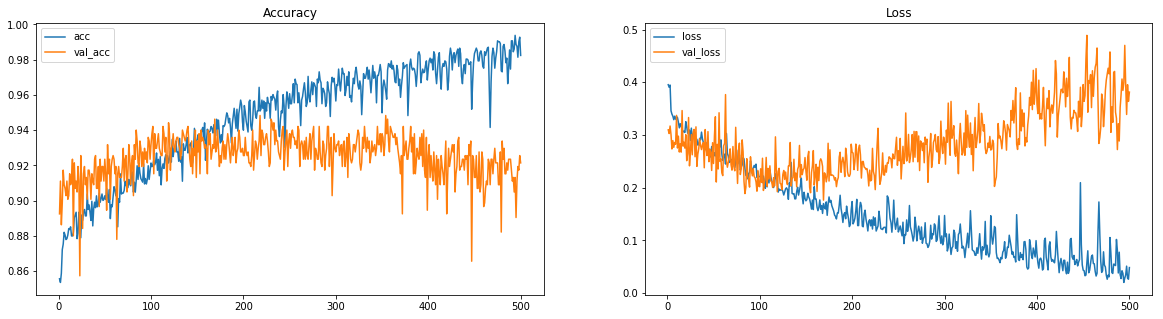

In [19]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.plot(r, history.history["val_acc"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.plot(r, history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [20]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

605/605 [==============================] - 0s 228us/step
Loss:     0.49
Accuracy: 0.91


In [30]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## ROC analysis

In [77]:
counter_F_neg=0
counter_F_pos=0
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        if model.predict_classes(X_test[i:(i+1),:,:])[0]==0:
            counter_F_neg=counter_F_neg+1
            print("False_negative i:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2),)          
        else:
            counter_F_pos=counter_F_pos+1
            print("False_positive i:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))
print("\ncounter_F_neg:",counter_F_neg) 
print("\ncounter_F_pos:",counter_F_pos) 
         
           

False_negative i: 22 	Pred: 0 	Actual: 3 	Probability: 0.66
False_positive i: 32 	Pred: 4 	Actual: 0 	Probability: 1.0
False_negative i: 35 	Pred: 0 	Actual: 2 	Probability: 0.97
False_positive i: 40 	Pred: 4 	Actual: 0 	Probability: 1.0
False_positive i: 45 	Pred: 2 	Actual: 0 	Probability: 0.99
False_positive i: 57 	Pred: 3 	Actual: 0 	Probability: 1.0
False_positive i: 58 	Pred: 2 	Actual: 0 	Probability: 0.98
False_positive i: 77 	Pred: 6 	Actual: 0 	Probability: 1.0
False_negative i: 86 	Pred: 0 	Actual: 3 	Probability: 0.92
False_positive i: 87 	Pred: 6 	Actual: 0 	Probability: 1.0
False_positive i: 93 	Pred: 5 	Actual: 0 	Probability: 1.0
False_negative i: 97 	Pred: 0 	Actual: 6 	Probability: 0.68
False_positive i: 100 	Pred: 1 	Actual: 0 	Probability: 1.0
False_positive i: 104 	Pred: 5 	Actual: 0 	Probability: 0.81
False_positive i: 122 	Pred: 3 	Actual: 0 	Probability: 1.0
False_negative i: 155 	Pred: 0 	Actual: 2 	Probability: 0.93
False_negative i: 158 	Pred: 0 	Actual: 4 	P

In [ ]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

### 2.4 Save model

In [78]:
from keras.models import load_model
import h5py

In [81]:
# save model, delete current reference and re-load it from file
model.save('model_gesture.h5')
del model
model = load_model('model_gesture.h5')

In [ ]:
type(model)